In [1]:
import os
from netCDF4 import Dataset
from datetime import date
import numpy as np
#from oceans.colormaps import cm
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr  # for handling multi-dimensional data arrays

In [3]:
ls

FESOM_1year.ipynb        channel/
FESOM_interpolate.ipynb  parcels-container_2024.10.03-921b2b0.sif*
Untitled.ipynb


In [4]:
#path
fn="channel/u.fesom.1958.nc"
data=Dataset(fn)

In [5]:
data.variables

{'nz1': <class 'netCDF4._netCDF4.Variable'>
 float64 nz1(nz1)
     long_name: depth at layer midpoint
     units: m
     positive: down
     axis: Z
 unlimited dimensions: 
 current shape = (40,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: time
     standard_name: time
     units: seconds since 1958-01-01 0:0:0
     axis: T
     stored_direction: increasing
 unlimited dimensions: time
 current shape = (365,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'u': <class 'netCDF4._netCDF4.Variable'>
 float32 u(time, nz1, elem)
     description: zonal velocity
     long_name: zonal velocity
     units: m/s
     location: face
     mesh: fesom_mesh
 unlimited dimensions: time
 current shape = (365, 40, 21120)
 filling on, default _FillValue of 9.969209968386869e+36 used}

In [6]:
# lat = data.variables['lat'][:]
# lon = data.variables['lon'][:]
time = data.variables['time'][:]

print(time)

[   85800.   172200.   258600.   345000.   431400.   517800.   604200.
   690600.   777000.   863400.   949800.  1036200.  1122600.  1209000.
  1295400.  1381800.  1468200.  1554600.  1641000.  1727400.  1813800.
  1900200.  1986600.  2073000.  2159400.  2245800.  2332200.  2418600.
  2505000.  2591400.  2677800.  2764200.  2850600.  2937000.  3023400.
  3109800.  3196200.  3282600.  3369000.  3455400.  3541800.  3628200.
  3714600.  3801000.  3887400.  3973800.  4060200.  4146600.  4233000.
  4319400.  4405800.  4492200.  4578600.  4665000.  4751400.  4837800.
  4924200.  5010600.  5097000.  5183400.  5269800.  5356200.  5442600.
  5529000.  5615400.  5701800.  5788200.  5874600.  5961000.  6047400.
  6133800.  6220200.  6306600.  6393000.  6479400.  6565800.  6652200.
  6738600.  6825000.  6911400.  6997800.  7084200.  7170600.  7257000.
  7343400.  7429800.  7516200.  7602600.  7689000.  7775400.  7861800.
  7948200.  8034600.  8121000.  8207400.  8293800.  8380200.  8466600.
  8553

In [8]:
ds_mesh = xr.open_dataset("channel/fesom.mesh.diag.nc")
ds_mesh = ds_mesh.set_coords(["lat", "lon"])
ds_mesh = ds_mesh.assign_coords(node_id=(("nod2", ), range(ds_mesh.sizes["nod2"])))
ds_mesh

<xarray.Dataset> Size: 9MB
Dimensions:            (nz: 41, nz1: 40, elem: 21120, nod2: 10608, n3: 3,
                        n2: 2, edg_n: 31728, N: 6, n4: 4)
Coordinates:
  * nz                 (nz) float64 328B 0.0 9.038 18.98 ... 3.628e+03 4e+03
  * nz1                (nz1) float64 320B 4.519 14.01 ... 3.459e+03 3.814e+03
    lon                (nod2) float64 85kB ...
    lat                (nod2) float64 85kB ...
    node_id            (nod2) int64 85kB 0 1 2 3 4 ... 10604 10605 10606 10607
Dimensions without coordinates: elem, nod2, n3, n2, edg_n, N, n4
Data variables: (12/19)
    fesom_mesh         int32 4B ...
    elem_area          (elem) float64 169kB ...
    nlevels_nod2D      (nod2) int32 42kB ...
    nlevels            (elem) int32 84kB ...
    nod_in_elem2D_num  (nod2) int32 42kB ...
    nod_part           (nod2) int32 42kB ...
    ...                 ...
    face_links         (n3, elem) float64 507kB ...
    edge_face_links    (n2, edg_n) float64 508kB ...
    nod_in_elem2D      (N, nod2) int32 255kB ...
    edge_cross_dxdy    (n4, edg_n) float64 1MB ...
    gradient_sca_x     (n3, elem) float64 507kB ...
    gradient_sca_y     (n3, elem) float64 507kB ...
Attributes:
    Conventions:  UGRID-1.0

In [9]:
lon_bds = (ds_mesh.lon.min().data[()], np.ceil(ds_mesh.lon.max().data[()]))
lat_bds = (ds_mesh.lat.min().data[()], np.ceil(ds_mesh.lat.max().data[()]))

In [10]:
lon_grid = xr.DataArray(np.linspace(*lon_bds, 101), dims=("lon_grid", ), name="lon_grid")
lat_grid = xr.DataArray(np.linspace(*lat_bds, 101), dims=("lat_grid", ), name="lat_grid")
lon_grid_selector, lat_grid_selector = xr.broadcast(lon_grid, lat_grid)

In [11]:
lon=ds_mesh.lon
lat=ds_mesh.lat

In [12]:
print(len(lon))
print(len(lat))

10608
10608


In [ ]:
# ds_mesh.xoak.set_index(["lat", "lon"], "sklearn_geo_balltree")

# nodes_grid = ds_mesh.xoak.sel(lon=lon_grid_selector, lat=lat_grid_selector).node_id

# nodes_grid = nodes_grid.rename({"lon": "lon_fesom", "lat": "lat_fesom"})

# nodes_grid = nodes_grid.assign_coords(lon_grid=lon_grid, lat_grid=lat_grid)

# display(nodes_grid)

In [13]:
#previsualizacion de los datos para el dia 1 del mes seleccionado
u = data.variables['u'][:][:,:,:]
u

masked_array(
  data=[[[-6.30535869e-05, -1.48037943e-04, -2.06380952e-04, ...,
           4.58117313e-04,  5.03320771e-04,  7.73527601e-04],
         [-6.26272376e-05, -1.48114661e-04, -2.04864482e-04, ...,
           4.38925897e-04,  4.81201074e-04,  7.63650634e-04],
         [-6.22801672e-05, -1.48153747e-04, -2.02650757e-04, ...,
           4.18408279e-04,  4.55525267e-04,  7.52083317e-04],
         ...,
         [ 2.93085450e-05,  2.91738761e-05, -3.01147753e-04, ...,
          -3.78750410e-04, -4.35207243e-04, -2.19259382e-04],
         [ 4.39223586e-05,  4.16296898e-05, -2.69363954e-04, ...,
          -3.34816519e-04, -5.02652023e-04, -2.24076430e-04],
         [ 5.06558827e-05,  4.48275496e-05, -2.51952908e-04, ...,
          -3.39074933e-04, -5.86938753e-04, -2.41058297e-04]],

        [[-1.22082233e-03, -8.33425380e-04, -5.81569620e-04, ...,
           6.27027533e-04,  3.83125240e-04, -4.52756394e-05],
         [-1.22009707e-03, -8.33156577e-04, -5.79358835e-04, ...,
        

In [14]:
print(u.shape)
print(lon.shape)
print(lat.shape)

(365, 40, 21120)
(10608,)
(10608,)


In [20]:
import math

print(10608**2)

112529664


In [ ]:
# Load field data (lon, lat, U) from the fieldset
# lon = fieldset.U.grid.lon
# lat = fieldset.U.grid.lat

# U is the eastward current velocity; we get it for the first time step (index 0)
u_data = u
u_data = np.where(u_data == 0, np.nan, u_data)
# Create a meshgrid of lon/lat for plotting purposes
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Create the plot
plt.figure(figsize=(10, 6))

# Use a scatter plot to visualize U data on lon/lat
plt.pcolormesh(lon_grid, lat_grid, u_data, cmap='RdBu',shading='nearest',vmin=-1.5, vmax=1.5)
plt.colorbar(label='Eastward Velocity (U) [m/s]')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Eastward Current Velocity (U)')

# Show the plot
plt.show()

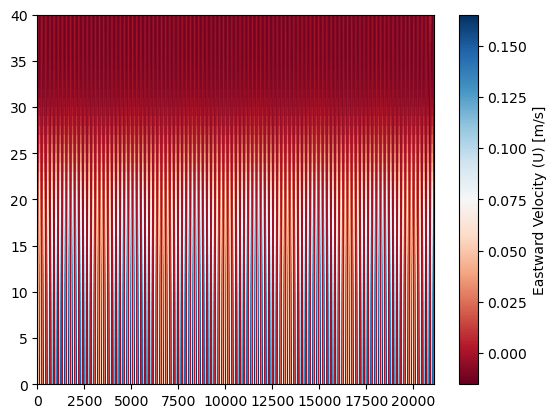

In [47]:
plt.pcolormesh(u_data, cmap='RdBu',shading='flat')
plt.colorbar(label='Eastward Velocity (U) [m/s]')
# Show the plot
plt.show()